# NLP-Based GitHub Language Predictor Project

- Predict the tax assessed property value of Zillow Single Family Residential properties with transaction dates in 2017.


# Goal

- Identify drivers of property value.
- Use drivers to develop a machine learning model to predict Single Family Residential property value.

# Imports

In [1]:
# local imports
# import config as c
import acquire as a
import prepare as p
import explore as e
import visual as v
# import model as m

# variable for API TOKEN access

# api_token = c.GITHUB_API_TOKEN

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jongarcia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

# Acquire

- Data acquired from GitHub's API using API token and written to a csv file.
- Data initially acquired on 19 Oct, 2023.
- It contained 677 rows and 3 columns before cleaning.
- Each row represents a unique repository for repositories starred more than 200 times and based on robotics projects.
- The columns (repos, readme) represented the label and text associated for each repo.

# Prepare

## Data Preprocessing Steps

### **Replacing Null/NaN Values:**
   - no null values were replaced.

###  **Column Renaming:**
   - renamed reame_contents column to shorten.

###  **Column Removal:**
   - Removed columns that did not contain useful information:
     - Columns with repo names
         - Repo names were used to retrieve text language and text data so it was no longer needed after retrieval.

### **Row Handling:**
   - All rows were revised and html tags, links, and other characters that were not useful were dropped.
   - Decreased feature space from 677 to 609 observation.

### **Data Type Validation:**
   - Checked and ensured that column data types were appropriate.

### **Feature Engineering:**
   - Bigrams, Trigrams as new features

### **Data Splitting:**
   - Split the data into three sets for modeling: training, validation, and test, with an approximate split of 70/15/15.

In [4]:
#
repos_df = a.text_data()

### Quick view of data,

In [5]:
# First 5 rows of data
repos_df.head()

,repo,language,text,bigrams,trigrams
0,AtsushiSakai/PythonRobotics,Python,pythonrobotics githubactionlinuxci githubactio...,path_planning grid_based path_tracking steerin...,pythonroboticsfigure1png_master_atsushisakaipy...
2,NxRLab/ModernRobotics,Python,modern robotics mechanic planning control code...,modern_robotics robotics_mechanic mechanic_pla...,modern_robotics_mechanic robotics_mechanic_pla...
4,onlytailei/CppRobotics,C++,cpprobotics cpp implementation pythonrobotics ...,red_circle black_line steering_control point_r...,speed_steering_control black_line_planned line...
5,JdeRobot/RoboticsAcademy,Other,roboticsacademy learn robotics artificial inte...,learn_robotics mini_radi roboticsacademy_learn...,roboticsacademy_learn_robotics learn_robotics_...
6,pptacher/probabilistic_robotics,C++,probabilisticrobotics working detailed solutio...,probabilistic_robotics victoria_park park_data...,victoria_park_dataset probabilisticrobotics_wo...


### Distribution of Repo Data

In [6]:
# function for data distribution based on target
# dist_of_data(df, 'home_value')

In [7]:
# Counts and ratios of language labels in a DataFrame
counts = e.counts_and_ratios(repos_df, "language")

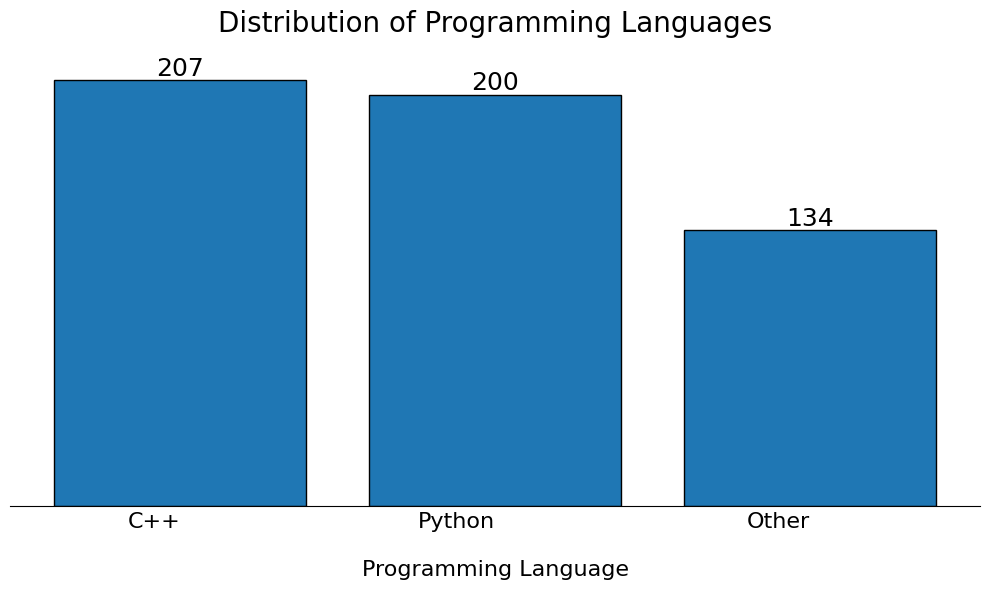

In [8]:
e.vis_1(repos_df)

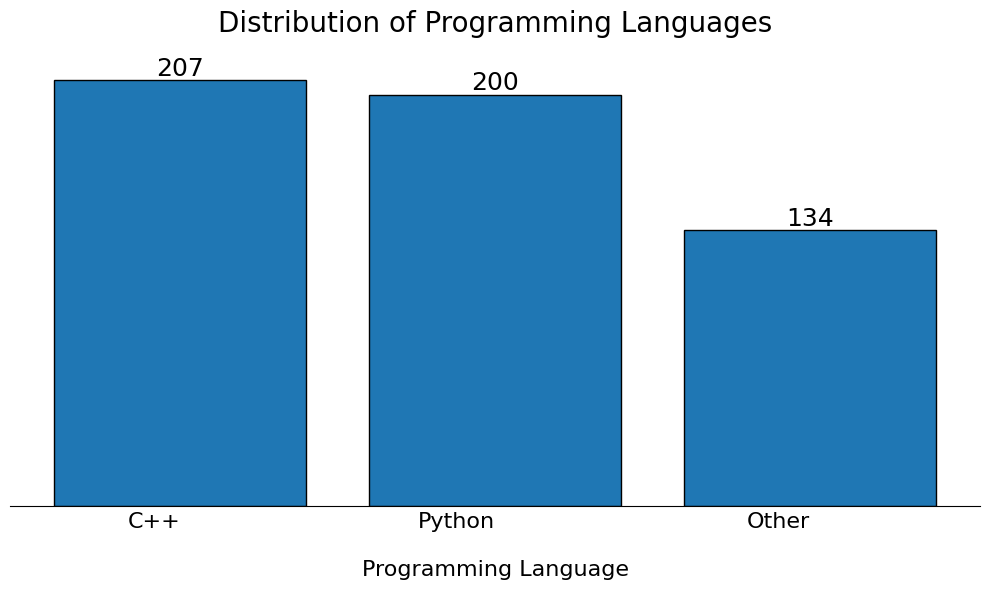

In [9]:
# Counts and ratios of language labels in a DataFrame
# Visualize the distribution
e.vis_1(repos_df)

# Explore

* Is there an equal proportion of the top ten most common words across all programming languages?
* Are the top 10 reoccurring words in C++ repositories related to C++ language?
* What are the top ten bigrams and trigrams for other programming languages?  
* Does the language feature have a significant reationship to the text data feature?  

# Question 1. - **Is there a significant difference in the frequency of the top 10 words used in repository descriptions among different languages (Python, C++, and Other)?**

- **Null Hypothesis($H0$):** There is **no difference** in the frequency of the top 10 words used in repository descriptions among the repositories with different languages.

- **Alternative Hypothesis($Ha$):** There **is a significant difference** in the frequency of the top 10 words used in repository descriptions among the repositories with different languages.  

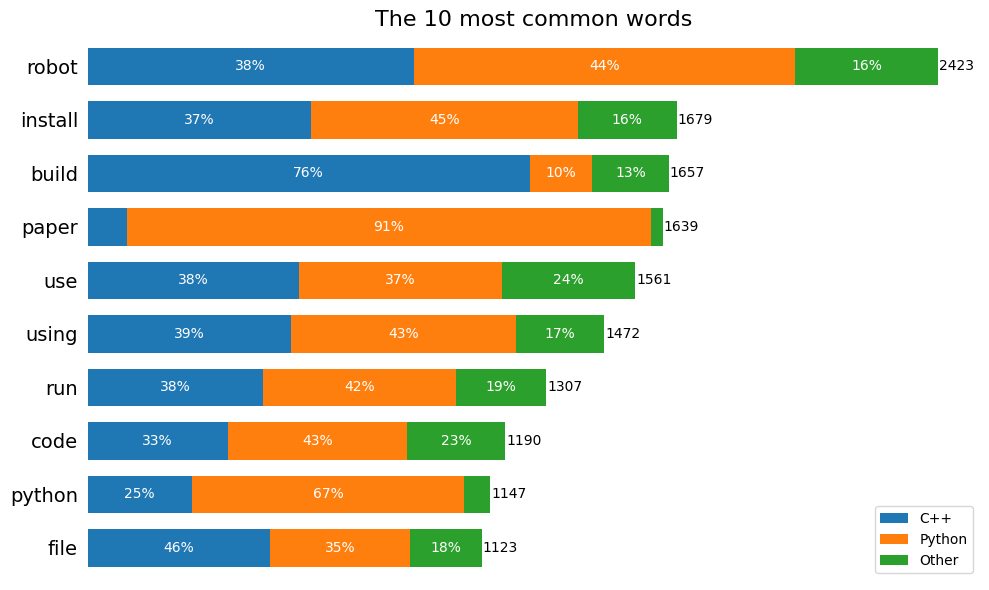

Chi-square Statistic: 2878.350562094149
p-value: 0.0
We reject the null hypothesis.


In [10]:
# Plot the top 10 words of all languages
# Perform a chi2 test
e.q1_vis_test(repos_df, alpha=0.05)

There **is a significant difference** in the frequency of the top 10 words used in repository descriptions among the repositories with different languages.  

# Question 2. - **Is there a significant association between the programming language and the likelihood that readme contains the word "build"?**  

- **Null Hypothesis($H0$):** There is **no association** between a repository's programming language and the presence of the word "build" in its README.

- **Alternative Hypothesis($Ha$):** There is a **significant association** between a repository's programming language and the presence of the word "build" in its README. 

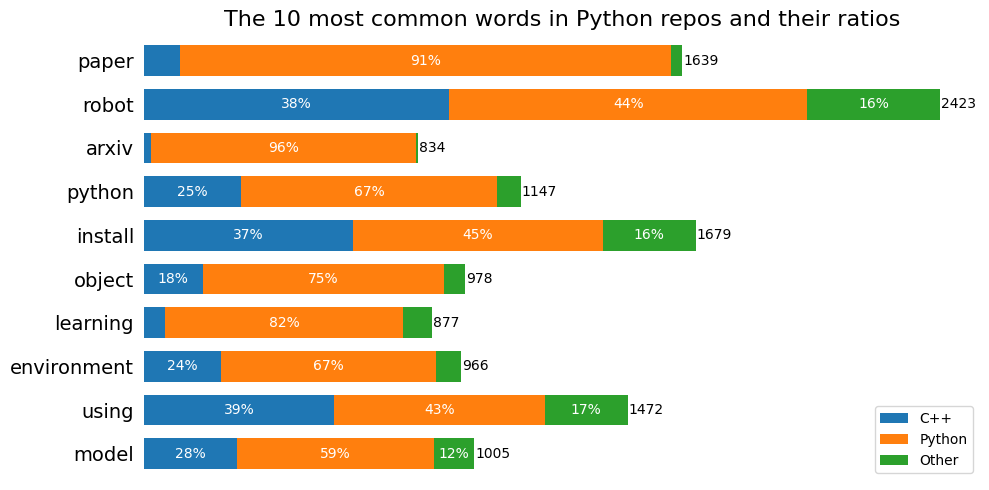

Chi-square Statistic: 76.39034483925082
p-value: 2.327866422955486e-18
We reject the null hypothesis.


In [11]:
e.qNew_vis_test(repos_df, alpha=0.05)

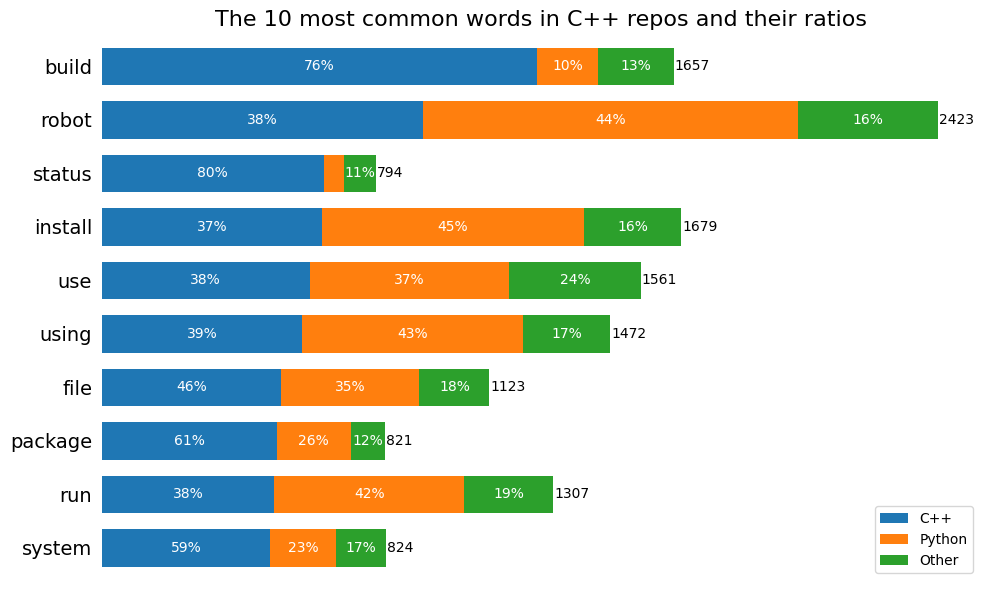

Chi-square Statistic: 76.39034483925082
p-value: 2.327866422955486e-18
We reject the null hypothesis.


In [10]:
# Plot the top 10 words in C++ repos
# Perform a chi2 test
e.q2_vis_test(repos_df, alpha=0.05)

There is a **significant association** between a repository's programming language and the presence of the word "build" in its README. 

# Question 3. - **Is there a significant association between the programming language and the likelihood that readme contains the word "build"?**  


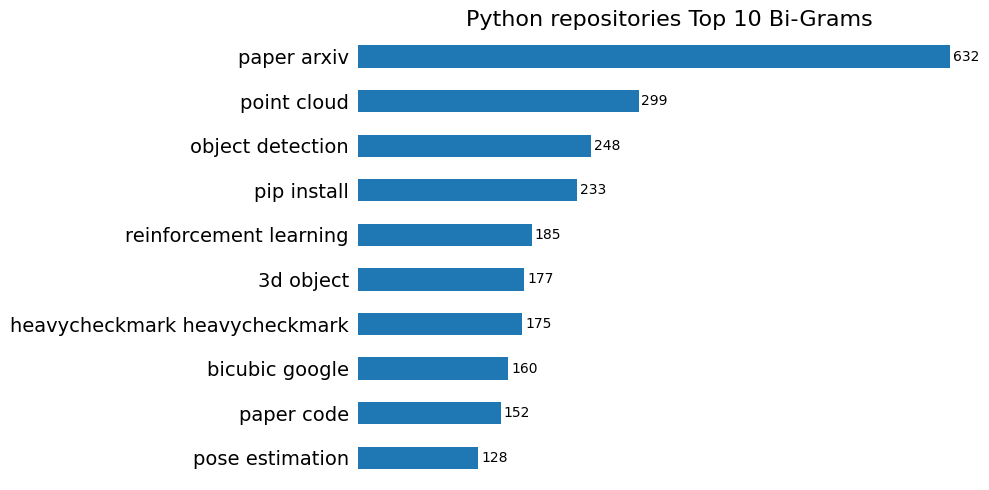

In [27]:
e.vis_4(repos_df, "Python repositories Top 10 Bi-Grams")

# Question 4. - **Is there a significant association between the programming language and the likelihood that readme contains the word "build"?**  


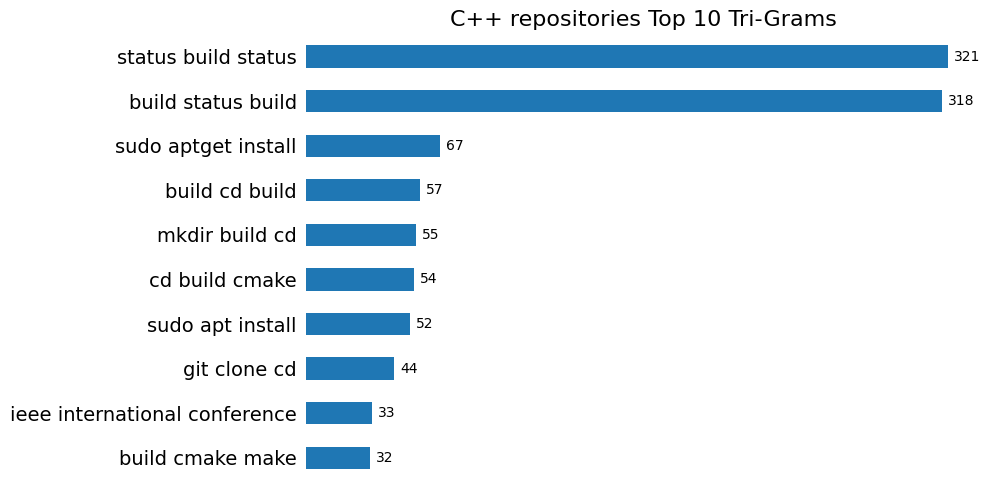

In [28]:
e.vis_5(repos_df, "C++ repositories Top 10 Tri-Grams")